##                                                     Matthew Afsahi



# In this project, I will be using Appache Spark engine and SQL to queries the data sets.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installing  java, appache spark and related libraries 

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

!pip install pyspark



In [3]:
# Iniating the spark on this notebook
import findspark

In [4]:
findspark.init('/content/spark-3.0.0-bin-hadoop3.2')


In [5]:
from pyspark.sql import SparkSession

In [6]:
spark=SparkSession.builder.appName('MyAssignment_3').getOrCreate()


In [7]:
#Reading the census data set from the could
census=spark.read.csv('/content/drive/My Drive/Colab Notebooks/data/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2 (1).csv',inferSchema=True,header=True)

In [8]:
census.printSchema()

root
 |-- COMMUNITY_AREA_NUMBER: integer (nullable = true)
 |-- COMMUNITY_AREA_NAME: string (nullable = true)
 |-- PERCENT OF HOUSING CROWDED: double (nullable = true)
 |-- PERCENT HOUSEHOLDS BELOW POVERTY: double (nullable = true)
 |-- PERCENT AGED 16+ UNEMPLOYED: double (nullable = true)
 |-- PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA: double (nullable = true)
 |-- PERCENT AGED UNDER 18 OR OVER 64: double (nullable = true)
 |-- PER_CAPITA_INCOME : integer (nullable = true)
 |-- HARDSHIP_INDEX: integer (nullable = true)



In [9]:
#Reading the school data set from the cloud
school=spark.read.csv('/content/drive/My Drive/Colab Notebooks/data/Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv',inferSchema=True,header=True)

In [10]:
school.printSchema()

root
 |-- School ID: integer (nullable = true)
 |-- NAME_OF_SCHOOL: string (nullable = true)
 |-- Elementary, Middle, or High School: string (nullable = true)
 |-- Street Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZIP Code: integer (nullable = true)
 |-- Phone Number: string (nullable = true)
 |-- Link : string (nullable = true)
 |-- Network Manager: string (nullable = true)
 |-- Collaborative Name: string (nullable = true)
 |-- Adequate Yearly Progress Made? : string (nullable = true)
 |-- Track Schedule: string (nullable = true)
 |-- CPS Performance Policy Status: string (nullable = true)
 |-- CPS Performance Policy Level: string (nullable = true)
 |-- HEALTHY_SCHOOL_CERTIFIED: string (nullable = true)
 |-- Safety Icon : string (nullable = true)
 |-- SAFETY_SCORE: integer (nullable = true)
 |-- Family Involvement Icon: string (nullable = true)
 |-- Family Involvement Score: string (nullable = true)
 |-- Environment 

In [11]:
census.show(10)

+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |HARDSHIP_INDEX|
+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                    1|        Rogers Park|                       7.7|                            23.6|                        8.7|                                        18.2|                            27.5|             23939|            39|
|                    2| 

In [12]:
# Creating a SQL temp for more queries, Note that SQL is working on top of Spark
census.createOrReplaceTempView('Census')

##Q1. What was the per capita income in North Park comunity? 26576

In [13]:
spark.sql("select * \
            from Census\
            where Census.COMMUNITY_AREA_NAME== 'North Park'").show()

+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |HARDSHIP_INDEX|
+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                   13|         North Park|                       3.9|                            13.2|                        9.9|                                        14.4|                            39.0|             26576|            33|
+---------------------+-

##Q2. How many comunity area were in the census data base? 77

In [14]:
spark.sql("select count(COMMUNITY_AREA_NUMBER) \
            from Census ").show()
            

+----------------------------+
|count(COMMUNITY_AREA_NUMBER)|
+----------------------------+
|                          77|
+----------------------------+



In [15]:
school.show(10)

+---------+--------------------+----------------------------------+--------------------+-------+-----+--------+--------------+--------------------+--------------------+--------------------+-------------------------------+--------------+-----------------------------+----------------------------+------------------------+------------+------------+-----------------------+------------------------+-----------------+-----------------+-----------------+-----------------+-------------+--------------+--------------+--------------+-----------------------+-----------------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------

In [16]:
# Creating the School temp data base on the cloud
school.createOrReplaceTempView('School')

## Q3. How many unique School are in Chicago data base system? 566


In [17]:
spark.sql("select  distinct count(NAME_OF_SCHOOL) \
            from School").show()

+---------------------+
|count(NAME_OF_SCHOOL)|
+---------------------+
|                  566|
+---------------------+



In [18]:
census.describe( ).show()

+-------+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+------------------+
|summary|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |    HARDSHIP_INDEX|
+-------+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+------------------+
|  count|                   77|                 78|                        78|                              78|                         78|                                          78|                              78|               

In [19]:
census.summary().show()

+-------+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+------------------+
|summary|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |    HARDSHIP_INDEX|
+-------+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+------------------+
|  count|                   77|                 78|                        78|                              78|                         78|                                          78|                              78|               

In [20]:
census.toPandas().shape

(78, 9)

In [21]:
census.toPandas().isnull().sum()

COMMUNITY_AREA_NUMBER                           1
COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  1
dtype: int64

In [22]:
census.createOrReplaceTempView('censusDataSQL')

##Q4. What recoreds or record has fount with no community area number in census data base? No name and No community area name has found.

In [23]:
spark.sql('select * \
          from censusDataSQL \
          where COMMUNITY_AREA_NUMBER IS NULL').show()

+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |HARDSHIP_INDEX|
+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                 null|            CHICAGO|                       4.7|                            19.7|                       12.9|                                        19.5|                            33.5|             28202|          null|
+---------------------+-

In [24]:
spark.sql('select * \
          from censusDataSQL \
          where HARDSHIP_INDEX  IS NULL').show()

+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|COMMUNITY_AREA_NUMBER|COMMUNITY_AREA_NAME|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |HARDSHIP_INDEX|
+---------------------+-------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                 null|            CHICAGO|                       4.7|                            19.7|                       12.9|                                        19.5|                            33.5|             28202|          null|
+---------------------+-

In [25]:
school.show(5)

+---------+--------------------+----------------------------------+--------------------+-------+-----+--------+--------------+--------------------+--------------------+--------------------+-------------------------------+--------------+-----------------------------+----------------------------+------------------------+------------+------------+-----------------------+------------------------+-----------------+-----------------+-----------------+-----------------+-------------+--------------+--------------+--------------+-----------------------+-----------------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------

In [26]:
# Droping the row wich will not affect the other rows.

census=census.na.drop()


In [27]:
# checking wich records have the null values?
census.toPandas().isnull().sum()

COMMUNITY_AREA_NUMBER                           0
COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  0
dtype: int64

In [28]:
census.toPandas().shape

(77, 9)

In [29]:
# Checking the value data types in our data. In order to fir the data in Machine Learning models, all should be numeric.

census.toPandas().dtypes

COMMUNITY_AREA_NUMBER                             int32
COMMUNITY_AREA_NAME                              object
PERCENT OF HOUSING CROWDED                      float64
PERCENT HOUSEHOLDS BELOW POVERTY                float64
PERCENT AGED 16+ UNEMPLOYED                     float64
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    float64
PERCENT AGED UNDER 18 OR OVER 64                float64
PER_CAPITA_INCOME                                 int32
HARDSHIP_INDEX                                    int32
dtype: object

In [30]:
# Sine we have a unique number for the community area name we do not need to have the same information as it is a string object.

census=census.drop(census.COMMUNITY_AREA_NAME)

In [31]:
census.toPandas().dtypes

COMMUNITY_AREA_NUMBER                             int32
PERCENT OF HOUSING CROWDED                      float64
PERCENT HOUSEHOLDS BELOW POVERTY                float64
PERCENT AGED 16+ UNEMPLOYED                     float64
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    float64
PERCENT AGED UNDER 18 OR OVER 64                float64
PER_CAPITA_INCOME                                 int32
HARDSHIP_INDEX                                    int32
dtype: object

## With a quick glance we can have an idea that which variabls may be more effective for the deep finding which variabls have more stronger coefficient we need to feature extraction process, which I will impliment those methods later on this project.

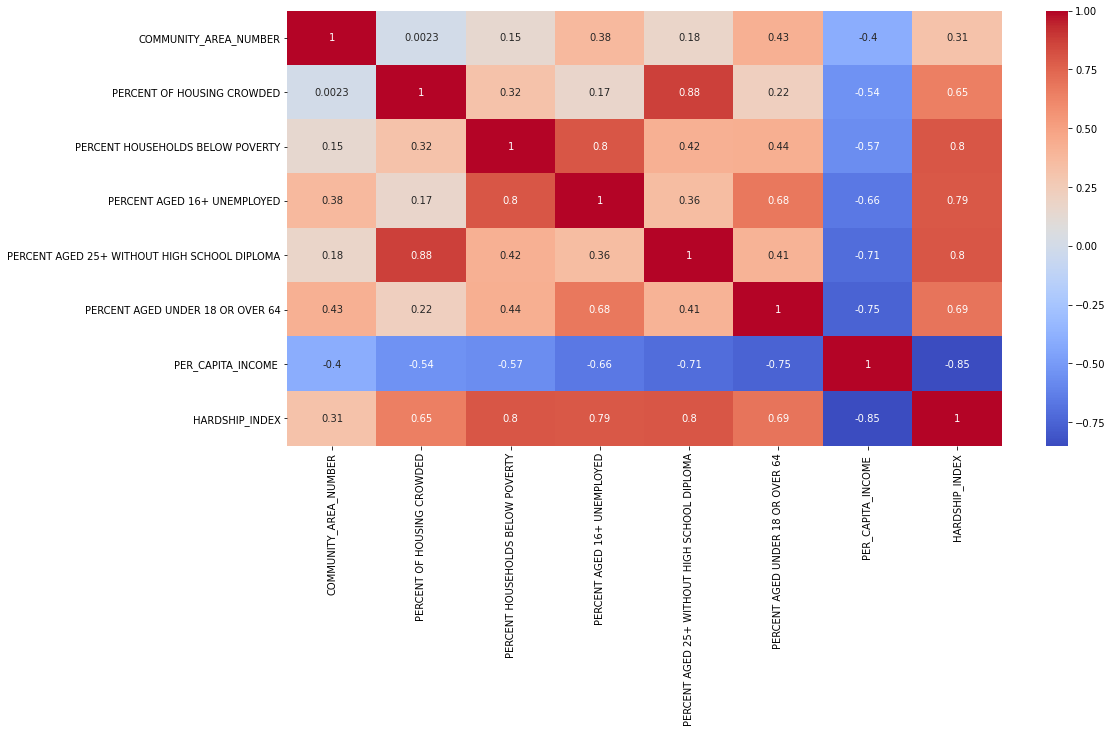

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(16,8))
sns.heatmap(census.toPandas().corr(),annot=True,cmap='coolwarm')

In [33]:
census.show(2)

+---------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|COMMUNITY_AREA_NUMBER|PERCENT OF HOUSING CROWDED|PERCENT HOUSEHOLDS BELOW POVERTY|PERCENT AGED 16+ UNEMPLOYED|PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA|PERCENT AGED UNDER 18 OR OVER 64|PER_CAPITA_INCOME |HARDSHIP_INDEX|
+---------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                    1|                       7.7|                            23.6|                        8.7|                                        18.2|                            27.5|             23939|            39|
|                    2|                       7.8|                            17.2|                     

In [34]:
y=census.select('PER_CAPITA_INCOME ').collect()

In [35]:
X=census.drop('PER_CAPITA_INCOME ').collect()

In [36]:
census.columns

['COMMUNITY_AREA_NUMBER',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER_CAPITA_INCOME ',
 'HARDSHIP_INDEX']

## Feature Selection and Extraction to find the most effective explantory variable in our data. Here I am using ExtraTreesClassifier to find out and later on I wil implimenting more effective methods to do so.

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
model=ExtraTreesClassifier()

In [39]:
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [40]:
import pandas as pd
feat_importance=pd.Series(model.feature_importances_,index=['COMMUNITY_AREA_NUMBER',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'HARDSHIP_INDEX'])

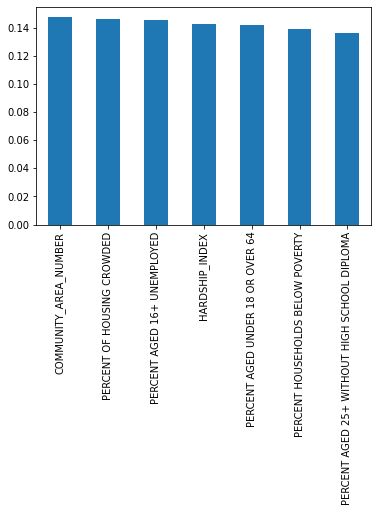

In [41]:
feat_importance.nlargest(7).plot(kind='bar')

# in addition to the correlation plot I tested to which variables should 
# I keep and importance feature testing and it turns out that the most variables 
# are highly correlated each other.Therfore, I will keep the rest of the 
# variables in this data. 

In [42]:
school.show(10)

+---------+--------------------+----------------------------------+--------------------+-------+-----+--------+--------------+--------------------+--------------------+--------------------+-------------------------------+--------------+-----------------------------+----------------------------+------------------------+------------+------------+-----------------------+------------------------+-----------------+-----------------+-----------------+-----------------+-------------+--------------+--------------+--------------+-----------------------+-----------------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------

In [43]:
# More SQL 
school.createOrReplaceTempView('SchoolDataSQL')

In [44]:
school.toPandas().shape

(566, 78)

##Finding whic variables in our data is object type, as we see there are alots of variables in the school data set.

In [45]:
school.dtypes

[('School ID', 'int'),
 ('NAME_OF_SCHOOL', 'string'),
 ('Elementary, Middle, or High School', 'string'),
 ('Street Address', 'string'),
 ('City', 'string'),
 ('State', 'string'),
 ('ZIP Code', 'int'),
 ('Phone Number', 'string'),
 ('Link ', 'string'),
 ('Network Manager', 'string'),
 ('Collaborative Name', 'string'),
 ('Adequate Yearly Progress Made? ', 'string'),
 ('Track Schedule', 'string'),
 ('CPS Performance Policy Status', 'string'),
 ('CPS Performance Policy Level', 'string'),
 ('HEALTHY_SCHOOL_CERTIFIED', 'string'),
 ('Safety Icon ', 'string'),
 ('SAFETY_SCORE', 'int'),
 ('Family Involvement Icon', 'string'),
 ('Family Involvement Score', 'string'),
 ('Environment Icon ', 'string'),
 ('Environment Score', 'int'),
 ('Instruction Icon ', 'string'),
 ('Instruction Score', 'int'),
 ('Leaders Icon ', 'string'),
 ('Leaders Score ', 'string'),
 ('Teachers Icon ', 'string'),
 ('Teachers Score', 'string'),
 ('Parent Engagement Icon ', 'string'),
 ('Parent Engagement Score', 'string'),
 

## Looping through the school data set to find the String Objects.

In [46]:
# the columns which are string and not numeric
c=0
for i,j in school.dtypes:
  if j=='string':
    c+=1
    print(i)
   
print('---------------------------------------------------------------------------------->>>>>>>>')
print('\n')

print(f'There are {c} categorical variable in school data set')
  

NAME_OF_SCHOOL
Elementary, Middle, or High School
Street Address
City
State
Phone Number
Link 
Network Manager
Collaborative Name
Adequate Yearly Progress Made? 
Track Schedule
CPS Performance Policy Status
CPS Performance Policy Level
HEALTHY_SCHOOL_CERTIFIED
Safety Icon 
Family Involvement Icon
Family Involvement Score
Environment Icon 
Instruction Icon 
Leaders Icon 
Leaders Score 
Teachers Icon 
Teachers Score
Parent Engagement Icon 
Parent Engagement Score
Parent Environment Icon
Parent Environment Score
AVERAGE_STUDENT_ATTENDANCE
Average Teacher Attendance
Individualized Education Program Compliance Rate 
Pk-2 Literacy %
Pk-2 Math %
Gr3-5 Grade Level Math %
Gr3-5 Grade Level Read % 
Gr3-5 Keep Pace Read %
Gr3-5 Keep Pace Math %
Gr6-8 Grade Level Math %
Gr6-8 Grade Level Read %
Gr6-8 Keep Pace Math%
Gr6-8 Keep Pace Read %
Gr-8 Explore Math %
Gr-8 Explore Read %
ISAT Value Add Color Math
ISAT Value Add Color Read
Students Taking  Algebra %
Students Passing  Algebra %
9th Grade EXPL

In [47]:
school.show(10)

+---------+--------------------+----------------------------------+--------------------+-------+-----+--------+--------------+--------------------+--------------------+--------------------+-------------------------------+--------------+-----------------------------+----------------------------+------------------------+------------+------------+-----------------------+------------------------+-----------------+-----------------+-----------------+-----------------+-------------+--------------+--------------+--------------+-----------------------+-----------------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------

## There are too many variable in school data sets that shoud be drop becasue many of them have the same informatio, for example since we know that this data set is for Chicago city and IL state, so we do not need to repeat same information again. For example, City,State are the same thing and also as we have a unique id's for the school, so we do not need the name of the school in our data. Also, there are many more variables that I think not having usefull information and they are listed below.

In [48]:
school=school.drop('NAME_OF_SCHOOL','Street Address','City','State','Phone Number','Link',' Network Manager','Collaborative Name',
            'CPS Performance Policy Level','Safety Icon','Family Involvement Icon','Environment Icon',
            'Instruction Icon','Leaders Icon','Teachers Icon','Parent Engagement Icon','Parent Environment Icon','COMMUNITY_AREA_NAME','Location')

In [49]:
school.show()

+---------+----------------------------------+--------+--------------------+--------------------+-------------------------------+--------------+-----------------------------+------------------------+------------+------------+------------------------+-----------------+-----------------+-----------------+-----------------+-------------+--------------+--------------+--------------+-----------------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+--

In [50]:
school=school.drop('Link ','Network Manager','CPS Performance Policy Status','Safety Icon ','Environment Icon ','Instruction Icon ',
            'Leaders Icon ','Parent Engagement Icon ')

In [51]:
school.show()

+---------+----------------------------------+--------+-------------------------------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+--------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+--------------------------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+------

In [52]:
c=0
for i,j in school.dtypes:
  if j=='string': 
    c+=1
    print(i)

print()
print('-------------------------------------------------->>>')
print('The categorical variables reduced to ------->', c)

Elementary, Middle, or High School
Adequate Yearly Progress Made? 
Track Schedule
HEALTHY_SCHOOL_CERTIFIED
Family Involvement Score
Leaders Score 
Teachers Icon 
Teachers Score
Parent Engagement Score
Parent Environment Score
AVERAGE_STUDENT_ATTENDANCE
Average Teacher Attendance
Individualized Education Program Compliance Rate 
Pk-2 Literacy %
Pk-2 Math %
Gr3-5 Grade Level Math %
Gr3-5 Grade Level Read % 
Gr3-5 Keep Pace Read %
Gr3-5 Keep Pace Math %
Gr6-8 Grade Level Math %
Gr6-8 Grade Level Read %
Gr6-8 Keep Pace Math%
Gr6-8 Keep Pace Read %
Gr-8 Explore Math %
Gr-8 Explore Read %
ISAT Value Add Color Math
ISAT Value Add Color Read
Students Taking  Algebra %
Students Passing  Algebra %
9th Grade EXPLORE (2009) 
9th Grade EXPLORE (2010) 
10th Grade PLAN (2009) 
10th Grade PLAN (2010) 
Net Change EXPLORE and PLAN
11th Grade Average ACT (2011) 
Net Change PLAN and ACT
College Eligibility %
Graduation Rate %
College Enrollment Rate %
Freshman on Track Rate %

----------------------------

## Choosing the "Adequate Yearly Progress Made?" variable as a target variables could lead us to answer this reserch question that *which schoo did have very well progress among the all schools in Chicao?*

In [53]:
## chosing ==============> Adequate Yearly Progress Made? yes,no as a target variable and move on

In [54]:
school.select('Adequate Yearly Progress Made? ').show()

+-------------------------------+
|Adequate Yearly Progress Made? |
+-------------------------------+
|                             No|
|                             No|
|                             No|
|                             No|
|                            NDA|
|                            Yes|
|                            Yes|
|                             No|
|                            NDA|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
|                             No|
+-------------------------------+
only showing top 20 rows



In [55]:
school=school.withColumnRenamed('Adequate Yearly Progress Made? ','Target')

In [56]:
# from now the Adequate Yearly Progress Made? variable name has changed to Target

school.select('Target').show()

+------+
|Target|
+------+
|    No|
|    No|
|    No|
|    No|
|   NDA|
|   Yes|
|   Yes|
|    No|
|   NDA|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
|    No|
+------+
only showing top 20 rows



In [57]:
school.select('Target').toPandas().value_counts()

Target
No        476
Yes        72
NDA        18
dtype: int64

In [58]:
school.select('Target').toPandas().describe()

,Target
count,566
unique,3
top,No
freq,476


## As we see the most frequent variable is our data has responded with NO among the 566, there were 476 No and 72 Yes.

In [59]:
school.select('Target').toPandas().value_counts().to_dict()

{('NDA',): 18, ('No',): 476, ('Yes',): 72}

In [60]:
school.show(10)


+---------+----------------------------------+--------+------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+--------------+-----------------------+------------------------+--------------------------+---------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+--------------------------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+---------------------------+---

In [61]:
pip install pyjanitor

In [62]:
from pyspark.sql import DataFrame
import janitor.spark

/usr/local/lib/python3.6/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Cleaning the data sets are the most important task. In these data sets all the variables names and contents are not properly provided. There are many issues that can affect the queries, so let do cleaning task on both data sets.

In [63]:
school=school.clean_names()

In [64]:
school.show(5)

+---------+--------------------------------+--------+------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+--------------+-----------------------+------------------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+-------------------------+--------------------------+-----------------------+-----------------------+---------------------+---------------------+---------------------------+-----------------

In [65]:
school.select('elementary_middle_or_high_school').toPandas().value_counts()

elementary_middle_or_high_school
ES                                  462
HS                                   93
MS                                   11
dtype: int64

In [66]:
from pyspark.ml.feature import StringIndexer,VectorAssembler,OneHotEncoder
from pyspark.sql.functions import when,col


In [67]:
school.toPandas().shape

(566, 59)

In [68]:
census.printSchema()

root
 |-- COMMUNITY_AREA_NUMBER: integer (nullable = true)
 |-- PERCENT OF HOUSING CROWDED: double (nullable = true)
 |-- PERCENT HOUSEHOLDS BELOW POVERTY: double (nullable = true)
 |-- PERCENT AGED 16+ UNEMPLOYED: double (nullable = true)
 |-- PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA: double (nullable = true)
 |-- PERCENT AGED UNDER 18 OR OVER 64: double (nullable = true)
 |-- PER_CAPITA_INCOME : integer (nullable = true)
 |-- HARDSHIP_INDEX: integer (nullable = true)



In [69]:
census=census.clean_names()

In [70]:
census.show(10)

+---------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|community_area_number|percent_of_housing_crowded|percent_households_below_poverty|percent_aged_16+_unemployed|percent_aged_25+_without_high_school_diploma|percent_aged_under_18_or_over_64|per_capita_income_|hardship_index|
+---------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+
|                    1|                       7.7|                            23.6|                        8.7|                                        18.2|                            27.5|             23939|            39|
|                    2|                       7.8|                            17.2|                     

In [71]:
# Saving schools as s temp and census as c temp for more sql queries
census.createOrReplaceTempView('c')
school.createOrReplaceTempView('s')

In [72]:
school.show(5)

+---------+--------------------------------+--------+------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+--------------+-----------------------+------------------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+-------------------------+--------------------------+-----------------------+-----------------------+---------------------+---------------------+---------------------------+-----------------

In [73]:
# Finding which columns are common between two data sets.
set(school.columns).intersection(set(census.columns))

{'community_area_number'}

In [74]:
census.toPandas().shape

(77, 8)

In [75]:
# Joining two data sets based on common column 
data=school.join(census,on='community_area_number',how='inner').distinct()

In [76]:
data.printSchema()

root
 |-- community_area_number: integer (nullable = true)
 |-- school_id: integer (nullable = true)
 |-- elementary_middle_or_high_school: string (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- target: string (nullable = true)
 |-- track_schedule: string (nullable = true)
 |-- healthy_school_certified: string (nullable = true)
 |-- safety_score: integer (nullable = true)
 |-- family_involvement_score: string (nullable = true)
 |-- environment_score: integer (nullable = true)
 |-- instruction_score: integer (nullable = true)
 |-- leaders_score_: string (nullable = true)
 |-- teachers_icon_: string (nullable = true)
 |-- teachers_score: string (nullable = true)
 |-- parent_engagement_score: string (nullable = true)
 |-- parent_environment_score: string (nullable = true)
 |-- average_student_attendance: string (nullable = true)
 |-- rate_of_misconducts_per_100_students_: double (nullable = true)
 |-- average_teacher_attendance: string (nullable = true)
 |-- individualized

In [77]:
data.limit(5).show()

+---------------------+---------+--------------------------------+--------+------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+--------------+-----------------------+------------------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+-------------------------+--------------------------+-----------------------+-----------------------+---------------------+---------------------+-----------------------

In [78]:
# droping the na values from the data
data=data.na.drop()

In [79]:
data.toPandas().shape

(436, 66)

In [80]:
# Since this col, does not give much information, dropping it.
data=data.drop('teachers_icon_')

In [81]:
data.show(5)

+---------------------+---------+--------------------------------+--------+------+--------------+------------------------+------------+------------------------+-----------------+-----------------+--------------+--------------+-----------------------+------------------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------+-----------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+-------------------------+--------------------------+-----------------------+-----------------------+---------------------+---------------------+---------------------------+----------

In [82]:
data.describe().show()

+-------+---------------------+------------------+--------------------------------+-----------------+------+--------------+------------------------+------------------+------------------------+------------------+-----------------+-----------------+------------------+-----------------------+------------------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+------------------+------------------+------------------------+-------------------------+----------------------+----------------------+------------------------+------------------------+---------------------+----------------------+-------------------+-------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+-------------------------+--------------------------+-----------------------+-----------------------+---------------------+----------

## Counting the rows with the respect of their columns ti find out how many NDA's are in our table. NOTE: The NDA gives us NO information. Let find out!

In [83]:
from pyspark.sql.functions import count

In [84]:
for i in data.columns:
  print(data.filter(data[i]=='NDA').count(),'========>>   ',data[i],"==========>  Have NDA's")
#data.filter(data['students_taking_algebra_%']=='NDA')

0 ========>>    Column<b'community_area_number'> ==========>  Have NDA's
0 ========>>    Column<b'school_id'> ==========>  Have NDA's
0 ========>>    Column<b'elementary_middle_or_high_school'> ==========>  Have NDA's
0 ========>>    Column<b'zip_code'> ==========>  Have NDA's
3 ========>>    Column<b'target'> ==========>  Have NDA's
0 ========>>    Column<b'track_schedule'> ==========>  Have NDA's
0 ========>>    Column<b'healthy_school_certified'> ==========>  Have NDA's
0 ========>>    Column<b'safety_score'> ==========>  Have NDA's
204 ========>>    Column<b'family_involvement_score'> ==========>  Have NDA's
0 ========>>    Column<b'environment_score'> ==========>  Have NDA's
0 ========>>    Column<b'instruction_score'> ==========>  Have NDA's
206 ========>>    Column<b'leaders_score_'> ==========>  Have NDA's
206 ========>>    Column<b'teachers_score'> ==========>  Have NDA's
78 ========>>    Column<b'parent_engagement_score'> ==========>  Have NDA's
78 ========>>    Column<b'pare

## Since some columns have many NDA's it is better todrop them 
## Since does not give any usefull information

In [85]:
# these cols have many NDA as results of the above calculation and since gives no usefull infromation better to drop them
to_be_dropped=['family_involvement_score','leaders_score_',
               'teachers_score','parent_engagement_score',
               'parent_environment_score','pk_2_literacy_%',
               'pk_2_math_%','gr3_5_grade_level_math_%',
               'gr3_5_grade_level_read_%_','gr3_5_keep_pace_read_%',
               'gr3_5_keep_pace_math_%','gr6_8_grade_level_math_%',
               'gr6_8_grade_level_read_%','gr6_8_keep_pace_math%',
               'gr6_8_keep_pace_read_%','gr_8_explore_math_%',
               'gr_8_explore_read_%','students_taking_algebra_%',
               'students_passing_algebra_%','9th_grade_explore_2009_',
               '9th_grade_explore_2010_','10th_grade_plan_2009_',
               '10th_grade_plan_2010_','net_change_explore_and_plan',
               '11th_grade_average_act_2011_','net_change_plan_and_act',
               'college_eligibility_%','graduation_rate_%',
               'college_enrollment_rate_%','freshman_on_track_rate_%',
               ]

In [86]:
data_NDA_drop=data.drop(*to_be_dropped)

In [87]:
# Data reduced to 35 columns with the 436 records
data_NDA_drop.toPandas().shape

(436, 35)

In [88]:
len(data_NDA_drop.dtypes)

35

## Ckecking out that how many catgorical variables are in our data

In [89]:
## These coulumns has the string type and they should be converted to numeric
for i,j in data_NDA_drop.dtypes:
  if j=='string':
    print(i,'============> has a string type of a value should be numeric type')
    print()
    print('---'*50)

elementary_middle_or_high_school ============> has a string type of a value should be numeric type

------------------------------------------------------------------------------------------------------------------------------------------------------
target ============> has a string type of a value should be numeric type

------------------------------------------------------------------------------------------------------------------------------------------------------
track_schedule ============> has a string type of a value should be numeric type

------------------------------------------------------------------------------------------------------------------------------------------------------
healthy_school_certified ============> has a string type of a value should be numeric type

------------------------------------------------------------------------------------------------------------------------------------------------------
average_student_attendance ============> has a s

In [90]:
data_NDA_drop.select('elementary_middle_or_high_school').show()

+--------------------------------+
|elementary_middle_or_high_school|
+--------------------------------+
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
|                              HS|
|                              ES|
|                              ES|
|                              ES|
|                              MS|
|                              ES|
|                              ES|
|                              ES|
|                              ES|
+--------------------------------+
only showing top 20 rows



In [91]:
data_NDA_drop.select('elementary_middle_or_high_school').toPandas().value_counts()

elementary_middle_or_high_school
ES                                  417
MS                                   11
HS                                    8
dtype: int64

## Encoding the categorical variable to dummies process doing with StringIndexer function from Mlib

In [92]:
indexer=StringIndexer(inputCol='elementary_middle_or_high_school',outputCol='elementary_middle_or_high_school_indexer')

In [93]:
indexed=indexer.fit(data_NDA_drop).transform(data_NDA_drop)

In [94]:
indexed.show(10)

+---------------------+---------+--------------------------------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+----------------------------------------+
|community_area_number|school_id|elementary_middle_or_high_school|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_att

In [95]:
indexed=indexed.drop('elementary_middle_or_high_school')

In [96]:
indexed=indexed.withColumnRenamed('elementary_middle_or_high_school_indexer','elementary_middle_or_high_school')

In [97]:
indexed.show(10)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teacher_attendance|i

In [98]:
indexed.select('track_schedule').toPandas().value_counts()

track_schedule
Standard          237
Track_E           199
dtype: int64

In [99]:
indexer=StringIndexer(inputCol='track_schedule',outputCol='track_schedule_indexer')

In [100]:
indexed=indexer.fit(indexed).transform(indexed)

In [101]:
indexed.show(5)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+----------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|avera

In [102]:
indexed=indexed.withColumn('track_schedule',indexed['track_schedule_indexer'])

In [103]:
indexed.show(4)
indexed=indexed.drop('track_schedule_indexer')
indexed.show(4)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+----------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|avera

In [104]:
indexed.select('healthy_school_certified').toPandas().value_counts()

healthy_school_certified
No                          424
Yes                          12
dtype: int64

In [105]:
indexer=StringIndexer(inputCol='healthy_school_certified',outputCol='healthy_school_certified_indexer')

In [106]:
indexed=indexer.fit(indexed).transform(indexed)

In [107]:
indexed.show(50)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+--------------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_stude

In [108]:
indexed=indexed.withColumn('healthy_school_certified',indexed['healthy_school_certified_indexer'])
indexed=indexed.drop('healthy_school_certified_indexer')

In [109]:
indexed.show(5)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teacher_attendance|i

## There are very inconvinience number format with the % sign infront of them also they are string type that they should be numeric. Procedure to clean these columns as belowe

In [110]:
indexed.select('average_student_attendance').show()

+--------------------------+
|average_student_attendance|
+--------------------------+
|                    95.10%|
|                    95.30%|
|                    95.90%|
|                    94.90%|
|                    95.10%|
|                    92.40%|
|                    94.90%|
|                    95.00%|
|                    95.70%|
|                    92.80%|
|                    96.60%|
|                    88.40%|
|                    96.50%|
|                    95.20%|
|                    93.00%|
|                    95.50%|
|                    94.90%|
|                    94.70%|
|                    95.50%|
|                    92.10%|
+--------------------------+
only showing top 20 rows



In [111]:
from pyspark.sql.functions import format_number,format_string,split


## Getting rid of the % percentage sign stuck to the number

In [112]:
indexed=indexed.withColumn('average_student_attendance',split(indexed['average_student_attendance'],'%').getItem(0))

In [113]:
indexed.select('average_student_attendance').show()

+--------------------------+
|average_student_attendance|
+--------------------------+
|                     95.10|
|                     95.30|
|                     95.90|
|                     94.90|
|                     95.10|
|                     92.40|
|                     94.90|
|                     95.00|
|                     95.70|
|                     92.80|
|                     96.60|
|                     88.40|
|                     96.50|
|                     95.20|
|                     93.00|
|                     95.50|
|                     94.90|
|                     94.70|
|                     95.50|
|                     92.10|
+--------------------------+
only showing top 20 rows



## Casting the string format to float format

In [114]:
indexed=indexed.withColumn('average_student_attendance',indexed['average_student_attendance'].cast('float'))

In [115]:
indexed.select('average_student_attendance').dtypes

[('average_student_attendance', 'float')]

In [116]:
indexed.select('average_teacher_attendance').dtypes

[('average_teacher_attendance', 'string')]

In [117]:
indexed.select('average_teacher_attendance').show(4)

+--------------------------+
|average_teacher_attendance|
+--------------------------+
|                    96.70%|
|                    96.50%|
|                    96.90%|
|                    94.20%|
+--------------------------+
only showing top 4 rows




## Getting rid of the % sign and transforming that to a numebr

In [118]:
indexed=indexed.withColumn('average_teacher_attendance',
                   split(indexed['average_teacher_attendance'],'%').getItem(0))

In [119]:
indexed.select('average_teacher_attendance').show(10)

+--------------------------+
|average_teacher_attendance|
+--------------------------+
|                     96.70|
|                     96.50|
|                     96.90|
|                     94.20|
|                     96.80|
|                     93.30|
|                     96.00|
|                     94.60|
|                     95.70|
|                     95.50|
+--------------------------+
only showing top 10 rows



In [120]:
indexed=indexed.withColumn('average_teacher_attendance',indexed['average_teacher_attendance'].cast('float'))

In [121]:
indexed.select('average_teacher_attendance').dtypes

[('average_teacher_attendance', 'float')]

In [122]:
indexed.select('individualized_education_program_compliance_rate_').show(5)

+-------------------------------------------------+
|individualized_education_program_compliance_rate_|
+-------------------------------------------------+
|                                           98.90%|
|                                           97.30%|
|                                          100.00%|
|                                          100.00%|
|                                          100.00%|
+-------------------------------------------------+
only showing top 5 rows



In [123]:
indexed=indexed.withColumn('individualized_education_program_compliance_rate_',
                   split(indexed['individualized_education_program_compliance_rate_'],'%').getItem(0))

In [124]:
indexed.select('individualized_education_program_compliance_rate_').show(5)

+-------------------------------------------------+
|individualized_education_program_compliance_rate_|
+-------------------------------------------------+
|                                            98.90|
|                                            97.30|
|                                           100.00|
|                                           100.00|
|                                           100.00|
+-------------------------------------------------+
only showing top 5 rows



## Categorical variables and useless for ML models, so they should be numeric

In [125]:
indexed.select('isat_value_add_color_math').show()

+-------------------------+
|isat_value_add_color_math|
+-------------------------+
|                   Yellow|
|                   Yellow|
|                   Yellow|
|                      Red|
|                    Green|
|                    Green|
|                    Green|
|                   Yellow|
|                      Red|
|                    Green|
|                   Yellow|
|                      Red|
|                      Red|
|                   Yellow|
|                    Green|
|                      Red|
|                    Green|
|                   Yellow|
|                      Red|
|                   Yellow|
+-------------------------+
only showing top 20 rows



## Transforming the SAT values to numeric encoding

In [126]:
indexer=StringIndexer(inputCol='isat_value_add_color_math',outputCol='isat_value_add_color_math_indexer')
indexed=indexer.fit(indexed).transform(indexed)


In [127]:
indexed.show(5)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+---------------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_stud

In [128]:
indexed=indexed.drop('isat_value_add_color_math')

In [129]:
indexed=indexed.withColumnRenamed('isat_value_add_color_math_indexer','isat_value_add_color_math')

In [130]:
indexed.select('individualized_education_program_compliance_rate_').show(5)

+-------------------------------------------------+
|individualized_education_program_compliance_rate_|
+-------------------------------------------------+
|                                            98.90|
|                                            97.30|
|                                           100.00|
|                                           100.00|
|                                           100.00|
+-------------------------------------------------+
only showing top 5 rows



## This variable is also string and it should be transformd to the float nuumber

In [131]:
indexed.select('individualized_education_program_compliance_rate_').dtypes

[('individualized_education_program_compliance_rate_', 'string')]

In [132]:
indexed=indexed.withColumn('individualized_education_program_compliance_rate_',
                   indexed['individualized_education_program_compliance_rate_'].cast('float'))

In [133]:
indexed.select('individualized_education_program_compliance_rate_').dtypes

[('individualized_education_program_compliance_rate_', 'float')]

## Finding wich variable is remaining as n string

In [134]:
for i,j in indexed.dtypes:
  if j=='string':
    print(i,'=================> string type yet!')
    print()

target =================> string type yet!

isat_value_add_color_read =================> string type yet!



In [135]:
indexed.select('isat_value_add_color_read').show(5)

+-------------------------+
|isat_value_add_color_read|
+-------------------------+
|                    Green|
|                   Yellow|
|                   Yellow|
|                   Yellow|
|                      Red|
+-------------------------+
only showing top 5 rows



## Transfoming, encoding the variable isat_value_add_color_read

In [136]:
indexer=StringIndexer(inputCol='isat_value_add_color_read',outputCol='isat_value_add_color_read_indexer')
indexed=indexer.fit(indexed).transform(indexed)

In [137]:
indexed.show(5)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+-------------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+---------------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_stud

In [138]:
indexed=indexed.drop('isat_value_add_color_read')

In [139]:
indexed=indexed.withColumnRenamed('isat_value_add_color_read_indexer','isat_value_add_color_read')

## All the variables tranfformed to numerical with the encoding them 

In [140]:
indexed.dtypes

[('community_area_number', 'int'),
 ('school_id', 'int'),
 ('zip_code', 'int'),
 ('target', 'string'),
 ('track_schedule', 'double'),
 ('healthy_school_certified', 'double'),
 ('safety_score', 'int'),
 ('environment_score', 'int'),
 ('instruction_score', 'int'),
 ('average_student_attendance', 'float'),
 ('rate_of_misconducts_per_100_students_', 'double'),
 ('average_teacher_attendance', 'float'),
 ('individualized_education_program_compliance_rate_', 'float'),
 ('isat_exceeding_math_%', 'double'),
 ('isat_exceeding_reading_%_', 'double'),
 ('isat_value_add_math', 'double'),
 ('isat_value_add_read', 'double'),
 ('college_enrollment', 'int'),
 ('general_services_route_', 'int'),
 ('x_coordinate', 'double'),
 ('y_coordinate', 'double'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('ward', 'int'),
 ('police_district', 'int'),
 ('percent_of_housing_crowded', 'double'),
 ('percent_households_below_poverty', 'double'),
 ('percent_aged_16+_unemployed', 'double'),
 ('percent_aged_25+_w

In [141]:
indexed.select('target').toPandas().value_counts()

target
No        370
Yes        63
NDA         3
dtype: int64

## There are three record in our target columns that should be fixed. I will use the frequency method to replace the NDA's with the most frequent recods shown in the data.

In [142]:
indexed.filter(indexed['target']=='NDA').show()

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+-------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teacher_attendance|i

## Viewing that how the target variabl's records are showing up in our data set.

In [143]:
indexed.filter((indexed['community_area_number']==28) |(indexed['community_area_number']==24) |(indexed['community_area_number']==48)).show()

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+-------------------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teacher_attendance|i

In [144]:
# Replacing the NDA's with the None values then changing them. Spark and SQL data bases are hard to change the values.
# This is an easy trick to doing so.

indexed=indexed.withColumn('target',when(indexed['target']=='NDA',None).otherwise(indexed['target']))

In [145]:
indexed.select('target').toPandas().isnull().sum()

target    3
dtype: int64

# Because the top most frequesncy value is No in target variable I will replace the 3 null values with 0

In [146]:
indexed=indexed.fillna('No')

In [147]:
indexed.select('target').toPandas().isnull().sum()

target    0
dtype: int64

## Encoding the target variable

In [148]:
indexer=StringIndexer(inputCol='target',outputCol='target_indexer',)
indexed=indexer.fit(indexed).transform(indexed)

In [149]:
indexed.toPandas().isnull().sum()

community_area_number                                0
school_id                                            0
zip_code                                             0
target                                               0
track_schedule                                       0
healthy_school_certified                             0
safety_score                                         0
environment_score                                    0
instruction_score                                    0
average_student_attendance                           0
rate_of_misconducts_per_100_students_                0
average_teacher_attendance                           0
individualized_education_program_compliance_rate_    0
isat_exceeding_math_%                                0
isat_exceeding_reading_%_                            0
isat_value_add_math                                  0
isat_value_add_read                                  0
college_enrollment                                   0
general_se

In [150]:
indexed.show(10)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+-------------------------+--------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teach

## More Queries abour finding the interesting facts from our data

## Q6. What was the maximum amount of the Per Capita Income amoung the all schools in Chicago?

In [151]:
indexed.createOrReplaceTempView('inx')
spark.sql("select max(per_capita_income_) from inx").show()


+-----------------------+
|max(per_capita_income_)|
+-----------------------+
|                  88669|
+-----------------------+



## Q7. Interesting question 
## Did students with the highest per capita income rate do well performance in their education ? 75 % did NOT and 25 % did.

In [152]:
spark.sql('select target from inx where per_capita_income_==88669').show()

+------+
|target|
+------+
|    No|
|    No|
|    No|
|   Yes|
+------+



## Q8. What was the average percetage of housing population? 5 % per house.

In [153]:
spark.sql('select avg(percent_of_housing_crowded) from inx').show()

+-------------------------------+
|avg(percent_of_housing_crowded)|
+-------------------------------+
|              5.415825688073393|
+-------------------------------+



##Q9. How many students did enroll amoung the shools in the state in total? 250629 students.

In [154]:
spark.sql('select sum(college_enrollment) from inx').show()

+-----------------------+
|sum(college_enrollment)|
+-----------------------+
|                 250629|
+-----------------------+



##Q10. How many distinct police distriction were found in data? 436

In [155]:
spark.sql('select distinct count(police_district)  from inx').show()

+----------------------+
|count(police_district)|
+----------------------+
|                   436|
+----------------------+



In [156]:
indexed.show(5)

+---------------------+---------+--------+------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+-------------------------+--------------+
|community_area_number|school_id|zip_code|target|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teach

## Findig the coefficient correlations with visualization to Feature Extraction in the data after joing both data sets.

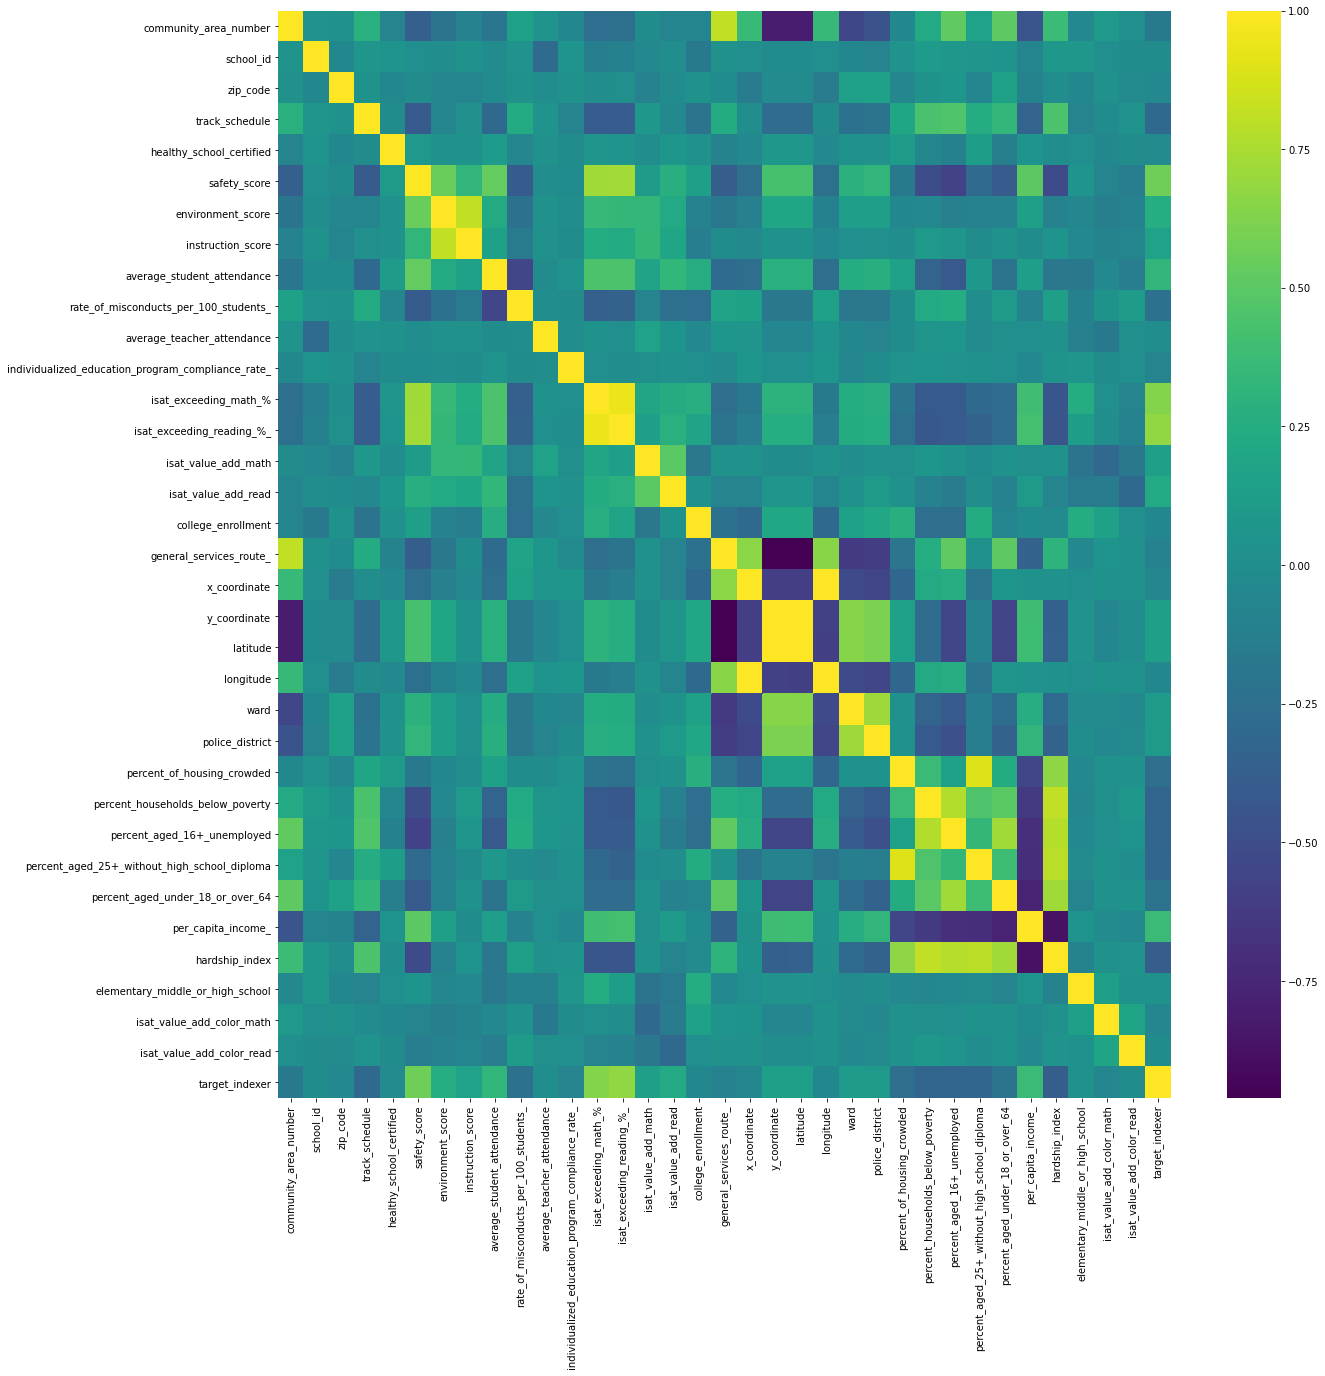

In [157]:
plt.figure(figsize=(20,20))
sns.heatmap(indexed.toPandas().corr(),cmap='viridis',)


## As we see visually finding the most efficient features are hard to determin 
## We need more suffisticated procedures to pick our feartures.

In [158]:
from pyspark.ml.feature import RFormula


In [159]:
formula = RFormula(
    formula="target ~ .",
    featuresCol="features",
    labelCol="label")

In [160]:
output = formula.fit(indexed).transform(indexed)
output.select("features", "label").show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[4.0,609852.0,606...|  1.0|
|[10.0,609937.0,60...|  0.0|
|[24.0,609828.0,60...|  1.0|
|[6.0,610355.0,606...|  1.0|
|[61.0,609929.0,60...|  0.0|
|[28.0,610180.0,60...|  0.0|
|[61.0,610239.0,60...|  0.0|
|[71.0,609805.0,60...|  0.0|
|[61.0,610167.0,60...|  0.0|
|[69.0,609813.0,60...|  0.0|
|[30.0,609973.0,60...|  0.0|
|[39.0,609746.0,60...|  0.0|
|[58.0,610353.0,60...|  0.0|
|[55.0,609856.0,60...|  0.0|
|[24.0,610076.0,60...|  0.0|
|[63.0,610532.0,60...|  0.0|
|[27.0,610251.0,60...|  0.0|
|[5.0,610010.0,606...|  0.0|
|[31.0,610125.0,60...|  0.0|
|[43.0,610103.0,60...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [161]:
output.summary().show()

+-------+---------------------+------------------+-----------------+------+-------------------+------------------------+------------------+------------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------------+-----------------+-------------------+--------------------+------------------+------------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+------------------+--------------------------------+-------------------------+-------------------------+------------------+------------------+
|summary|community_area_number|         school_id|         zip_code|target|     track_schedule|healthy_scho

## Feature Extraction and Selection on the best scores for both data sets, procedure.

# Setting the explantory and response variables to a panda data fram. Later on I'll use the sklearn library to doing so.

In [162]:
y=indexed.select('target').toPandas()

y

,target
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
431,Yes
432,Yes
433,No
434,Yes


In [163]:
X=indexed.select('*').drop('target').toPandas()
X


,community_area_number,school_id,zip_code,track_schedule,healthy_school_certified,safety_score,environment_score,instruction_score,average_student_attendance,rate_of_misconducts_per_100_students_,average_teacher_attendance,individualized_education_program_compliance_rate_,isat_exceeding_math_%,isat_exceeding_reading_%_,isat_value_add_math,isat_value_add_read,college_enrollment,general_services_route_,x_coordinate,y_coordinate,latitude,longitude,ward,police_district,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16+_unemployed,percent_aged_25+_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index,elementary_middle_or_high_school,isat_value_add_color_math,isat_value_add_color_read,target_indexer
0,4,609852,60625,0.0,0.0,70,53,51,95.099998,2.9,96.699997,98.900002,19.6,17.6,0.4,1.0,451,31,1161016.902,1934466.545,41.975867,-87.683254,47,20,3.4,10.9,8.2,13.4,25.5,37524,17,0.0,0.0,1.0,1.0
1,10,609937,60656,0.0,0.0,60,50,51,95.300003,10.2,96.500000,97.300003,34.4,33.5,-0.1,0.2,720,30,1130304.414,1934430.694,41.976353,-87.796198,41,16,2.0,5.4,9.0,11.5,39.5,32875,21,0.0,0.0,0.0,0.0
2,24,609828,60622,1.0,0.0,71,68,51,95.900002,4.3,96.900002,100.000000,29.1,22.2,0.4,0.6,348,35,1165168.464,1911344.181,41.912331,-87.668647,1,14,2.3,14.7,6.6,12.9,21.7,43198,10,0.0,0.0,0.0,1.0
3,6,610355,60613,0.0,0.0,99,95,80,94.900002,10.8,94.199997,100.000000,21.2,28.6,-1.2,-0.8,257,33,1164156.393,1927985.538,41.958017,-87.671893,47,19,1.1,11.4,4.7,2.6,17.0,60058,5,0.0,2.0,0.0,1.0
4,61,609929,60609,1.0,0.0,46,63,63,95.099998,10.1,96.800003,100.000000,9.6,1.1,0.9,-0.9,466,43,1165540.244,1869516.208,41.797543,-87.668471,16,9,11.9,29.0,23.0,41.5,38.9,12765,91,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,48,610316,60617,1.0,0.0,81,60,73,96.300003,33.4,95.400002,100.000000,27.5,26.4,0.1,1.0,264,47,1189297.589,1843689.527,41.726135,-87.582177,8,4,2.1,11.5,20.0,11.0,44.0,28887,38,0.0,0.0,1.0,1.0
432,2,610191,60659,0.0,0.0,78,55,43,96.400002,1.9,96.000000,100.000000,45.7,44.7,0.3,1.7,646,32,1160554.673,1941569.632,41.995368,-87.684756,50,24,7.8,17.2,8.8,20.8,38.5,23040,46,0.0,0.0,1.0,1.0
433,68,610173,60621,1.0,0.0,38,47,58,92.000000,3.9,95.500000,100.000000,25.7,12.9,3.6,3.2,355,42,1175428.391,1867127.635,41.790773,-87.632281,20,7,3.8,46.6,28.0,28.5,42.5,11888,94,0.0,1.0,1.0,0.0
434,24,609863,60622,0.0,0.0,66,57,55,95.500000,2.4,96.900002,92.599998,42.0,30.5,1.1,1.6,309,35,1161595.965,1906670.676,41.899581,-87.681902,32,13,2.3,14.7,6.6,12.9,21.7,43198,10,0.0,1.0,1.0,1.0


In [164]:
from sklearn.ensemble import ExtraTreesClassifier

In [165]:
model=ExtraTreesClassifier()

In [166]:
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [167]:
model.feature_importances_

array([3.97890280e-03, 7.72826958e-03, 5.33828777e-03, 1.36804008e-02,
       5.28962810e-04, 4.91021443e-02, 8.20795713e-03, 6.41260878e-03,
       1.57072889e-02, 9.71497360e-03, 4.26521202e-03, 6.68055561e-03,
       5.60634081e-02, 8.64967903e-02, 7.92647276e-03, 8.02268970e-03,
       7.32648090e-03, 5.65389827e-03, 6.65785780e-03, 5.51960950e-03,
       5.31501431e-03, 6.98798751e-03, 5.29615407e-03, 4.30781953e-03,
       1.00631745e-02, 1.13949401e-02, 1.38007618e-02, 1.95603177e-02,
       7.60257065e-03, 1.31895997e-02, 2.33500363e-02, 2.30777791e-03,
       5.67259202e-03, 4.02555011e-03, 5.52112932e-01])

In [168]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)

##Visualizing the most impotarn features base of the feature importance algorithms with the 10 variables

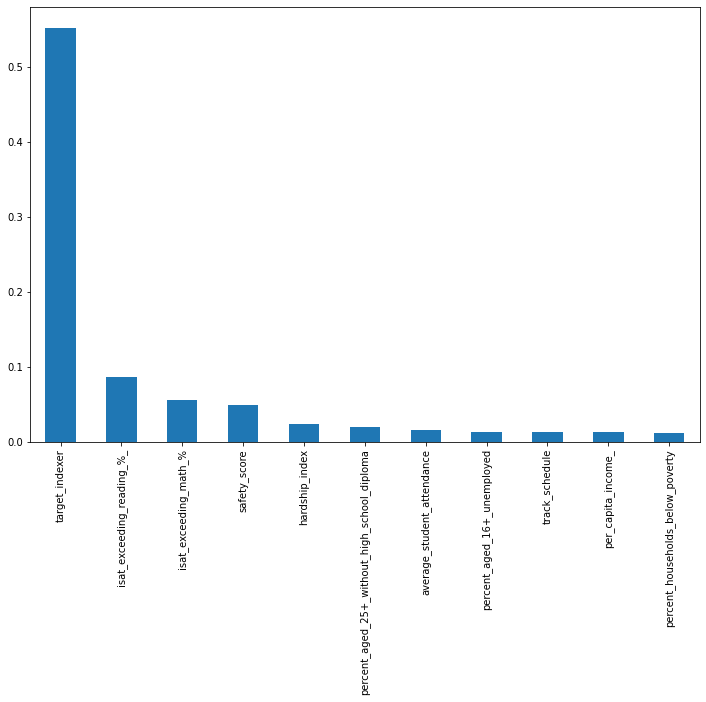

In [169]:
plt.figure(figsize=(12,8))
feat_importance.nlargest(11).plot(kind='bar')


## Here, found the top 10 high correlated columns. Also,
## lets filter out the columns to report the choosen colmns

In [170]:
indexed=indexed.drop('target')
indexed=indexed.withColumnRenamed('target_indexr','target')
indexed.show(5)

+---------------------+---------+--------+--------------+------------------------+------------+-----------------+-----------------+--------------------------+-------------------------------------+--------------------------+-------------------------------------------------+---------------------+-------------------------+-------------------+-------------------+------------------+-----------------------+------------+------------+-----------+------------+----+---------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+--------------------------------+------------------+--------------+--------------------------------+-------------------------+-------------------------+--------------+
|community_area_number|school_id|zip_code|track_schedule|healthy_school_certified|safety_score|environment_score|instruction_score|average_student_attendance|rate_of_misconducts_per_100_students_|average_teacher_attendance|

In [171]:
final_data_clean_data=indexed.select(['per_capita_income_',
                'percent_households_below_poverty',
                'percent_aged_16+_unemployed',
                'college_enrollment',
                'percent_aged_25+_without_high_school_diploma',
                'hardship_index',
                'average_student_attendance',
                'safety_score',
                'isat_exceeding_math_%',
                'isat_exceeding_reading_%_',
                'target_indexer'])

## Here is my final data, clean data, all colomns with the high corelation and selection feature process have done with many Machine Learning algorithms.

In [172]:
final_data_clean_data.show(20)

+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+
|per_capita_income_|percent_households_below_poverty|percent_aged_16+_unemployed|college_enrollment|percent_aged_25+_without_high_school_diploma|hardship_index|average_student_attendance|safety_score|isat_exceeding_math_%|isat_exceeding_reading_%_|target_indexer|
+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+
|             37524|                            10.9|                        8.2|               451|                                        13.4|            17|                      95.1|          70|        

## Our final clean data a Spark engine on top of the Sqlite3 data base.

In [173]:
type(final_data_clean_data)

pyspark.sql.dataframe.DataFrame

## Let's get have an idea what are the relation ships amoung all the variabls and how they could be related each other in one shot.

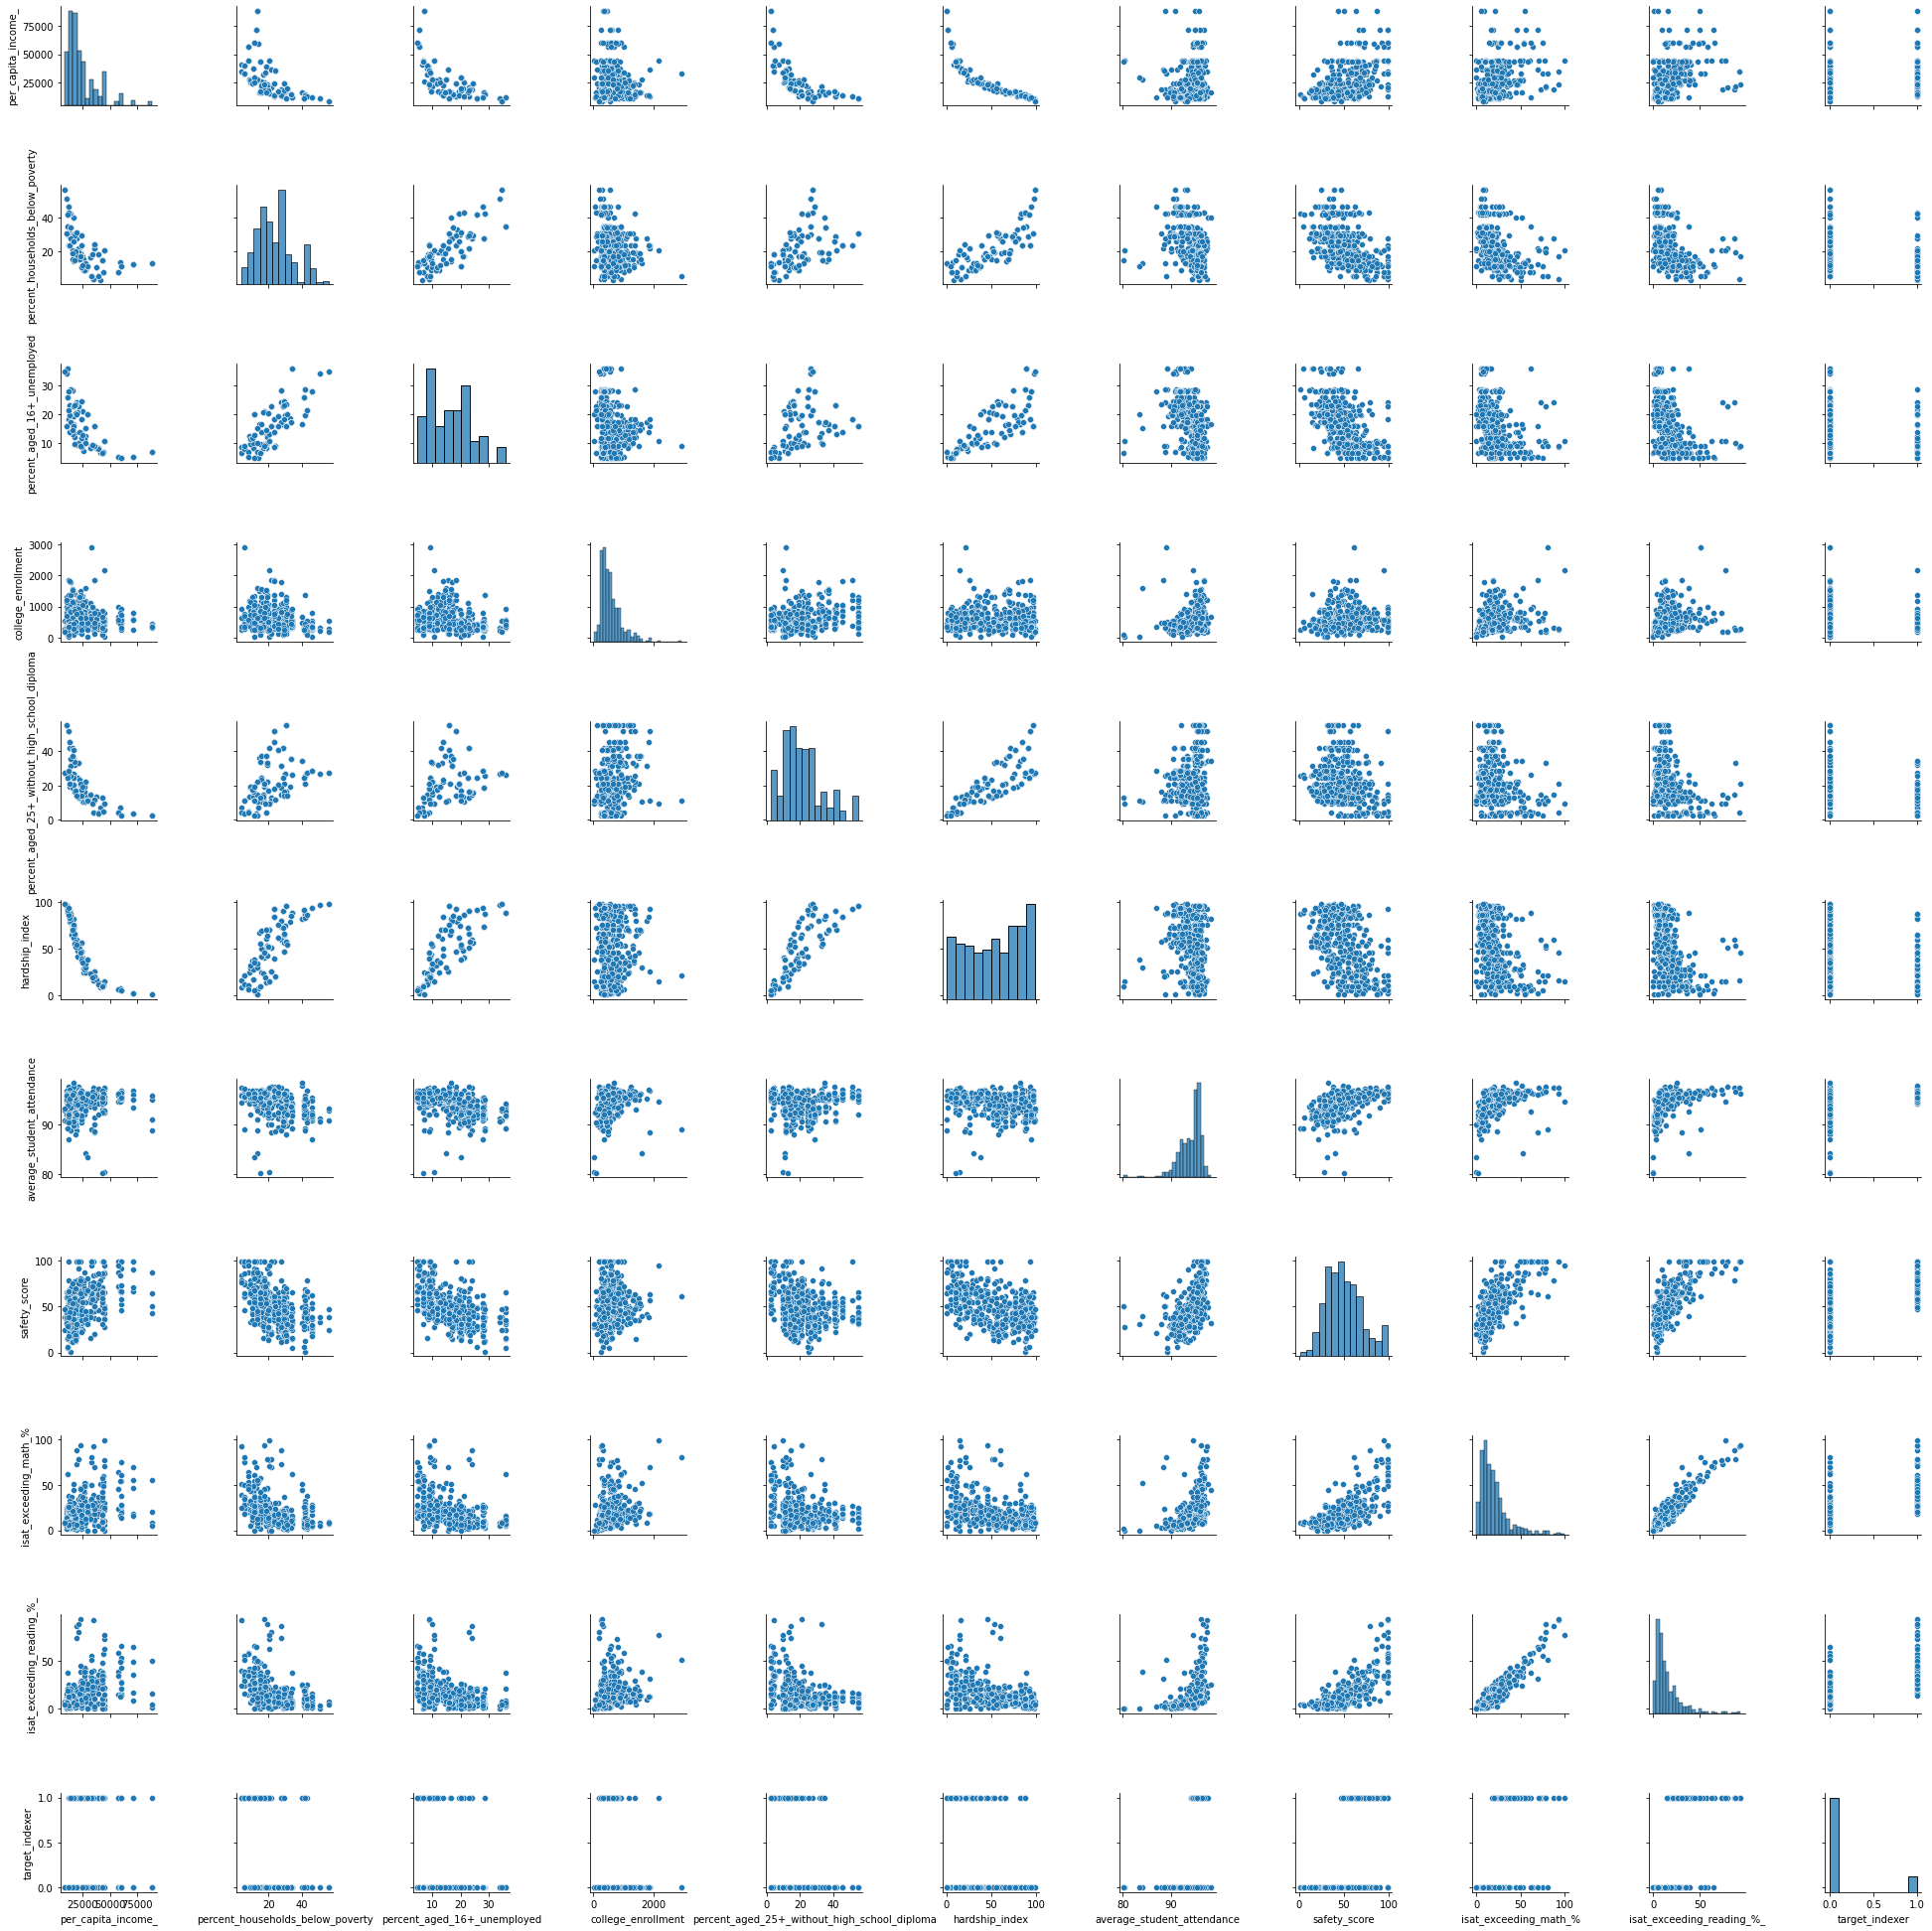

In [174]:
sns.pairplot(final_data_clean_data.toPandas())

## It seems that ISAT math and reading have a highly linearly relation, Also, as it seems there are some skewness and unnormality in the data, so it is better to transfom and normalize the data to get the better and precise reasults for our final goal. 

  #                             <h1> Modelig the Data  </h1>

## Research question was, did the student do well according the prepared data information and the responses were YES, or NO. Therefore, classification is the one that can be implemented in our case. Further, I want to find a model that responds to the question and it should be a Yes or No response.

##Logestic Regresion 

## In this project, I am using the Big Data Application Analysis  With Spark and SQL, using the Mlib library
## The Mlib machine learning libraries just accept two final columns to be processing one is feature and other is a label column, so for that we should transform all the data somehow that the model understands it.Therfore, we should use the Vectorixzation technique to transform our data to two vectors, which one is vector feature and the other is the label as told,so and in my case is target_indexr, also for reminding purpose the trageted variable is target_indexer or as it's original name to "Adequate Yearly Progress Made?"


In [175]:
from pyspark.ml.feature import VectorAssembler

In [176]:
final_data_clean_data.columns

['per_capita_income_',
 'percent_households_below_poverty',
 'percent_aged_16+_unemployed',
 'college_enrollment',
 'percent_aged_25+_without_high_school_diploma',
 'hardship_index',
 'average_student_attendance',
 'safety_score',
 'isat_exceeding_math_%',
 'isat_exceeding_reading_%_',
 'target_indexer']

## Vectorizing the variables

In [177]:
vec_assembler=VectorAssembler(inputCols=['per_capita_income_',
 'percent_households_below_poverty',
 'percent_aged_16+_unemployed',
 'college_enrollment',
 'percent_aged_25+_without_high_school_diploma',
 'hardship_index',
 'average_student_attendance',
 'safety_score',
 'isat_exceeding_math_%',
 'isat_exceeding_reading_%_'],outputCol='features')

In [178]:
out_vec=vec_assembler.transform(final_data_clean_data.drop('traget_indexer'))

## Scaling the Data


## It is an important task scalinig and normalizing the data.idea We should scale the data before more progress at this point.

In [179]:
from pyspark.ml.feature import StandardScaler

In [180]:
scaler=StandardScaler(inputCol='features',outputCol='scaledFeatures',withStd=True,withMean=False)

In [181]:
scalerModel=scaler.fit(out_vec)

In [182]:
final_vec=scalerModel.transform(out_vec)

In [183]:
final_vec.show()

+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+--------------------+--------------------+
|per_capita_income_|percent_households_below_poverty|percent_aged_16+_unemployed|college_enrollment|percent_aged_25+_without_high_school_diploma|hardship_index|average_student_attendance|safety_score|isat_exceeding_math_%|isat_exceeding_reading_%_|target_indexer|            features|      scaledFeatures|
+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+--------------------+--------------------+
|             37524|                            10.9|                        8.2| 

In [184]:
final_vec_selection=final_vec.select('features','target_indexer')

In [185]:
final_vec_selection.show()

+--------------------+--------------+
|            features|target_indexer|
+--------------------+--------------+
|[37524.0,10.9,8.2...|           1.0|
|[32875.0,5.4,9.0,...|           0.0|
|[43198.0,14.7,6.6...|           1.0|
|[60058.0,11.4,4.7...|           1.0|
|[12765.0,29.0,23....|           0.0|
|[44689.0,20.6,10....|           0.0|
|[12765.0,29.0,23....|           0.0|
|[15528.0,27.6,28....|           0.0|
|[12765.0,29.0,23....|           0.0|
|[17285.0,29.6,23....|           0.0|
|[10402.0,30.7,15....|           0.0|
|[35911.0,21.7,15....|           0.0|
|[13089.0,23.6,13....|           0.0|
|[22677.0,17.1,9.6...|           0.0|
|[43198.0,14.7,6.6...|           0.0|
|[12171.0,23.4,18....|           0.0|
|[12961.0,42.4,19....|           0.0|
|[57123.0,7.5,5.2,...|           0.0|
|[16444.0,25.8,15....|           0.0|
|[19398.0,31.1,20....|           0.0|
+--------------------+--------------+
only showing top 20 rows



## Training data and testing data is another important procedures that it should be done if we want to have a precise and accurate results.

## Train Test Split 

In [186]:
train,test=final_vec_selection.randomSplit([0.7,0.3])

In [187]:
from pyspark.ml.classification import LogisticRegression

##Fitting the model 

In [188]:
lR=LogisticRegression(labelCol='target_indexer')

In [189]:
lRModel=lR.fit(train)

##Model Evaluation

In [190]:
lRModel.summary.accuracy

0.9457627118644067

## Got a 95% accuracy which is awesome, the one reason for this is that the cleaning the data has completed with very causion! 

In [191]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

##More evaluation on test data

In [192]:
pred_and_labels=lRModel.evaluate(test)

In [193]:
pred_and_labels.predictions.show()

+--------------------+--------------+--------------------+--------------------+----------+
|            features|target_indexer|       rawPrediction|         probability|prediction|
+--------------------+--------------+--------------------+--------------------+----------+
|[12765.0,29.0,23....|           0.0|[7.40265565875461...|[0.99939073978838...|       0.0|
|[15528.0,27.6,28....|           0.0|[4.48023190780351...|[0.98879616311615...|       0.0|
|[44689.0,20.6,10....|           0.0|[5.45432903255368...|[0.99574047511837...|       0.0|
|[10402.0,30.7,15....|           0.0|[5.94611523408719...|[0.99739084222591...|       0.0|
|[12961.0,42.4,19....|           0.0|[0.01283717323910...|[0.50320924923807...|       0.0|
|[17104.0,19.2,12....|           0.0|[4.87549941845354...|[0.99242651334891...|       0.0|
|[44689.0,20.6,10....|           0.0|[4.29566909836284...|[0.98655576017202...|       0.0|
|[19713.0,16.9,20....|           0.0|[2.78883373937981...|[0.94206942929914...|       0.0|

## Comparing the predictions and the original values shows that how the model is predicting well.

##AUC ------> area under the curve evaluation process

In [194]:
AUC_eval=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='target_indexer')

In [195]:
AUC=AUC_eval.evaluate(pred_and_labels.predictions)

## 87% accuracy with the AUC test which is pretty good.

In [196]:
AUC

0.8767857142857143

In [197]:
final_data_clean_data.show(6)

+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+
|per_capita_income_|percent_households_below_poverty|percent_aged_16+_unemployed|college_enrollment|percent_aged_25+_without_high_school_diploma|hardship_index|average_student_attendance|safety_score|isat_exceeding_math_%|isat_exceeding_reading_%_|target_indexer|
+------------------+--------------------------------+---------------------------+------------------+--------------------------------------------+--------------+--------------------------+------------+---------------------+-------------------------+--------------+
|             37524|                            10.9|                        8.2|               451|                                        13.4|            17|                      95.1|          70|        

##Reports to Census

## With Quering and analyzing the data based on the machin learning techniques and feature selecting techniques, it has found that there are some columns to be consisder from amoung of the data sets.  

#1.per_capita_income_,
#2.percent_households_below_poverty,
#3.percent_aged_16+_unemployed,
#4.college_enrollment,
#5.percent_aged_25+_without_high_school_diploma,
#6.hardship_index,
#7.average_student_attendance,
#8.safety_score,
#9.isat_exceeding_math_%,
#10.isat_exceeding_reading_%_

## These are the most highly coefficiently linearly related and as a results these coloumns could be considered for further decisions.Also these predictors are trying to respond to the target variable as it is in the original data as "Adequate Yearly Progress Made?" 